# Project 2020 - Fundamentals of Data Analysis
This project performs and explains simple linear regression using the Python programming language. Using the *powerproduction* dataset, it sets out to accurately predict wind turbine power output from wind speed values

***

<br>



## Introduction

***



Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Plot style
plt.style.use('ggplot')

# Plot size
plt.rcParams['figure.figsize'] = [11, 6]

<br>



Read in powerproduction.csv  

In [3]:
pp = pd.read_csv("powerproduction.csv")
pp.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


<br>



The describe() method gives us a summary overview of the dataset, including the mean, standard deviation and quartile distribution of both variables

In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



#### Plot data for visualisation

Next, the variables are plotted on a scatterplot. Scatterplots allows us to visualise the relationship between two variables in a dataset. Through visualisation, we can get a preliminary indication as to what predictive model might be best suited. This can be inferred from the shape of the relationship between the variables. It can also give us additional information, such as the presence of outliers.

Text(0, 0.5, 'power (kW)')

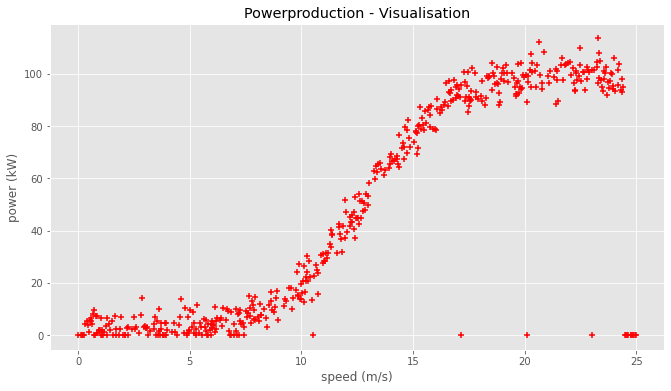

In [5]:
plt.scatter(pp.speed,pp.power,color='red',marker='+')

plt.title('Powerproduction - Visualisation')
plt.xlabel('speed (m/s)')
plt.ylabel('power (kW)')


We can see clearly that there is a strong relationship between both variables. It is important to establish a relationship *before* attempting to fit a linear model to observed data [1]. Often, as above, this can be see through data visualisation. However we can also use statistical methods to determine the relationship. A commonly used numerical measure in this regard is the *correlation coefficient*, which quantifies the association between two variables [2]. Also known as the *r* value, this will be examined in greater detail below.

#### Wind Turbine Power Curve
Looking more closely at the plot, we see that it produces a visualisation of the typical wind turbine power curve. The *cut-in* wind speed is at ~7m/s, below which the turbine is producing hardly any power. Between speeds of ~7 and ~17m/s the power ramps up to what is known as the *rated power capacity*. From speeds of ~17m/s the power generated remains more or less constant, right up to ~25m/s, or the *cut-out* wind speed. While there is much potential power in the wind speed above the cut-out speed, the cost of making the turbine capable of producing power under these conditions outweights the benefits of more power being generated [3]. <br>

#### Outliers
What is also notable from the plot is the presence of seeming outliers in the data. Broadly speaking, an outlier is a data point that is extremely high or extremely low [4]. They can impact the performace of a predictive model, misrepresenting the the data used to train and test the model. There are a number of observations where no power (0kW) is being generated despite sufficiently high wind speeds. We will take a closer look at these outliers below. 

#### Predictive model
From initial visualisation, we may deduce that a line (or curve) would closely fit the data. This implies that a linear regression model could be used to make power output predictions. As specified in the project brief, simple linear regression will be explained and performed on the *powerproduction* data set. A simple linear regression model has only one *predictor* i.e. a single independent variable (the *speed* variable in the context of the current project). It involves fitting a straight line to the data. However a curved line may yield more accurate results. This will also be exaimed further below.

<br>



### Regression Analysis

Regression analysis is a statistical method which describes the relationship between a *dependent* variable and one or more *independent* variables [1]. It can be used to infer the nature of the relationship and consequently, can enable us to make predictions based on a known independent variable or establish causation relationships between variables. In machine learning, it is used primarily to build predictive models [2] and it is this use which will be investigated below.
<br>


#### Simple linear regression
There are numerous types of regression analysis and choosing the most appropriate one depends on various factors, such as the nature of the data, the information the researcher is seeking to extract among others [3]. A simple linear regression model is applied to a *bivariate* data set - where one of the variables is the *predictor*, or independent variable and the other is known as the *target*, or dependent variable. The *powerproduction* data set meets this criterion with *wind speed* the predictor and *power output* the target. 

#### Correlation coefficient
As we saw above on the plot, there is visible positive relationship between speed and power in the data set. We can measure the *strength* of this relationship by calculating the correlation coefficient (also known as the *Pearson's correlation coefficient*) [4]. Using a statistical method to quantify the relationship strength makes our visual interpretation more robust. The mathematical formula is commonly expressed as [5]:

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

Below, I use `numpy.corrcoef()` to generate a correlation coefficient matrix between *speed* and *power*. I slice the resulting array to get the correlation coefficient. I used code found on kite.com [6]

In [6]:
# Generate correlation matrix
correlation_matrix = np.corrcoef(pp.speed, pp.power)

# Slice array to get correlation coefficient
correlation_xy = correlation_matrix[0, 1]

# Print value to screen
print('Correlation coefficient: ', correlation_xy)

Correlation coefficient:  0.8537775037188597


A value of 0.85 indicates a strong, positive relationship between speed and power: "Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered **highly correlated**." [7] 

<br>

#### Best fitting line
The next step in building our simple linear regression model is to determine the best fitting line for the data. As with the *correlation coefficient* above, we can visualise the data and approximate a line which best captures the data. `numpy.polyfit()` uses a more robust, mathematical method to determine the line of best fit. This is called the *ordinary least squares method*. It is among the "... most commonly used estimation methods for linear regression" [8] can be expressed mathematically as: <br> $$\Sigma_i(y_i - mx_i - c)$$ <br>

where $m$ = the slope and $c$ = the y-intercept. The least squares method calculates the error between all the observed y values in the data set and the predicted y values. `polyfit()` returns the values for $m$ and $c$ which minimize the result of the least squares method. Below, I pass the speed and power variables to the function. The third parameter is the degree of the fitting polynomial [9]. For simple linear regression, this will be 1 as a straight line is a first degree polynomial, expressed as $y = mx + c$:

In [7]:
# Call polyfit passing speed and power as parameters
coeffs = np.polyfit(pp.speed, pp.power, 1)

# Output polynomial coefficients (slope and y-intercept)
coeffs

array([  4.91759567, -13.89990263])

We can now plot the best fitting line over the data for visualisation. The polynomial coefficients represent the $m$ and $c$ values to generate the line:

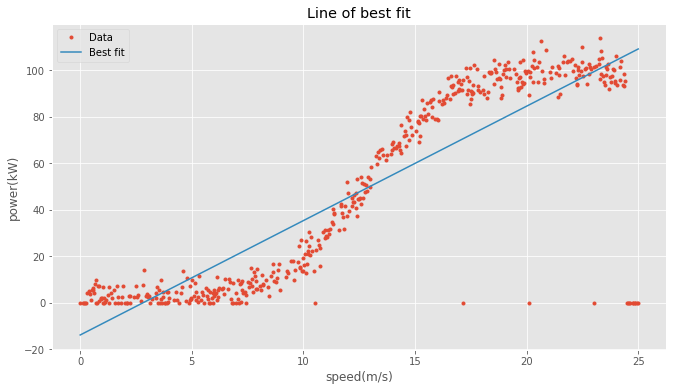

In [8]:
# Plot data
plt.plot(pp.speed, pp.power, '.', label="Data")

# Plot best fitting line
plt.plot(pp.speed, coeffs[0] * pp.speed + coeffs[1], '-', label='Best fit')

plt.title('Line of best fit')
plt.xlabel('speed(m/s)')
plt.ylabel('power(kW)')
plt.legend();

It is clear from this plot that the regression line does not fully capture all of the data. It over- and under-predicts at various points.

<br>



#### Make predictions

Given that we now have values for the slope and intercept, we can plug speed values into the equation to predict corresponding values for power:

In [45]:
# Slope
m = 4.91759567

# Intercept
c = -13.89990263

# Pick arbitrary value for wind speed
x = 16.5

# Equation of fitted line
y = m*x + c

# Print value for y
print('Predicted power value: ', y)

Predicted power value:  67.240425925


The model predicts that power output for a wind speed of 16.5m/s would be ~67.24kW. If we check these values on our plot above through visualisation, we can see that the power output of speeds of ~16.5m/s according to the observed data would be quite a bit higher. 

We can use `numpy`'s inbuilt `poly1d()` function to perform this same calculation [10]:

In [48]:
# Pass coeffs to the poly1d function
predict = np.poly1d(coeffs)
wind_speed = 16.5

# Output predicted power 
predict(wind_speed)

67.24042584865744

<br>



#### Model accuracy - R-squared

There are various statistical methods we can use to calculate the accuracy of our model e.g. *MSE (mean squared error)*, *MAE (mean absolute error)*, *RMSE (root mean squared error)*. Below I will use the *R-squared* method. This is also known as the *coefficient of determination* [11]. We use R-squared to quantify how well the line fits the data. In this regard, we can say that it is a "goodness of fit" measurement [12]. 

#### Outliers

As noted above, the presence of outliers can misrepresent 

Each column is separated from the dataset

In [9]:
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [10]:
power = pp.power
power

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

<br>



In [11]:
reg = LinearRegression()
reg.fit(speed_df, power)

LinearRegression()

In [12]:
reg.predict([[9.746]])

array([34.02698472])

In [13]:
reg.coef_

array([4.91759567])

In [14]:
reg.intercept_

-13.899902630519641

In [15]:
4.91759567*9.746 -13.899902630519641

34.02698476930036

In [16]:
rng = np.random.default_rng()

In [17]:
speed_list = 25 * rng.random(10) - 0

In [18]:
speed_arr = speed_list.reshape(-1, 1)
speed_arr

array([[ 1.3513325 ],
       [23.79856425],
       [ 6.30501027],
       [24.78304054],
       [13.64791056],
       [ 3.50007491],
       [23.61974966],
       [10.84491687],
       [17.01076914],
       [ 5.6676842 ]])

In [19]:
#speed_arr = speed_list.reshape(1, -1)

In [20]:
power_rand = reg.predict(speed_arr)
power_rand

array([ -7.25459577, 103.13181378,  17.10558856, 107.97307012,
        53.21500317,   3.3120506 , 102.2524759 ,  39.43101358,
        69.75218198,  13.9714766 ])

In [21]:
score = reg.score(speed_arr, power_rand)
score

1.0

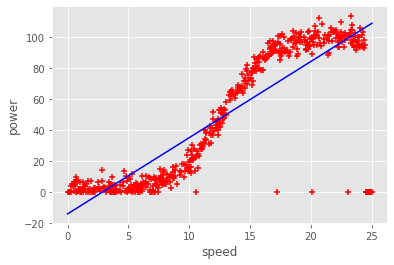

In [22]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp.speed,pp.power,color='red',marker='+')
plt.plot(pp.speed,reg.predict(pp[['speed']]),color='blue')

Fit line to data where turbine power most responsive

In [23]:
vmin = 7
vmax = 18
column = 'speed'


df1 = pp[pp[column].between(vmin, vmax)]
df1

,speed,power
138,7.057,1.485
139,7.082,9.779
140,7.107,0.000
141,7.157,7.973
142,7.182,0.067
...,...,...
354,17.643,102.322
355,17.793,100.429
356,17.818,93.105
357,17.843,91.270


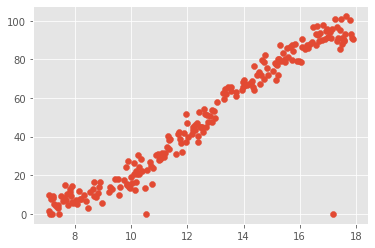

In [24]:
plt.scatter(df1.speed, df1.power)

In [25]:
A = df1.iloc[:, :-1].values
B = df1.iloc[:, 1].values

In [26]:
from sklearn.model_selection import train_test_split
A_Train, A_Test, B_Train, B_Test = train_test_split(A, B, test_size = 0.2)

In [27]:
reg.fit(A_Train, B_Train)

LinearRegression()

In [28]:
reg.predict(A_Test)

array([29.86700545, 89.33303777, 59.71836668, 48.58446221, 72.50910218,
       73.45586277, 68.24867955, 31.76052662, 74.40262335, 78.19913329,
       12.80637971, 11.85961913, 73.21917262, 72.98248247, 61.848578  ,
       95.73313932, 95.48698157, 78.67251359, 46.91816358,  9.95663035,
       24.17697434,  3.09261612, 65.87231048, 51.89812425, 27.01725609,
       47.86492416, 13.98983045,  4.51275699, 96.44320976, -1.65065441,
       69.43213028, 33.65404779, 45.26133256, 65.63562034, 45.02464241,
       50.95136367, 45.4980227 , -0.94058397, 45.97140299, 23.4669039 ,
       -2.83410514, 64.21547946, 81.74948549, 51.66143411, 77.01568256])

In [29]:
B_Test

array([22.758, 97.532, 61.127, 44.801, 73.911, 69.248, 72.016, 23.688,
       80.39 , 86.288,  8.937, 16.413, 77.725, 78.284, 63.91 , 87.731,
       91.125, 87.285, 40.519,  3.   , 13.657,  4.443, 76.551, 53.954,
       24.293, 44.745, 16.697,  5.947, 90.142,  9.406, 69.699, 31.153,
       45.056, 65.642, 41.599, 50.658, 43.198,  4.243, 46.136, 27.136,
        0.   , 67.263, 78.632, 47.787, 85.891])

In [30]:
reg.score(A_Test, B_Test)

0.9670747922161907

In [31]:
X = pp.iloc[:, :-1].values
Y = pp.iloc[:, 1].values

In [32]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=4380)

In [33]:
#X_Train

In [34]:
reg.fit(X_Train, Y_Train)

LinearRegression()

In [35]:
df_ytrain = pd.DataFrame(Y_Train)

In [36]:
df_xtrain = pd.DataFrame(X_Train)

In [37]:
'''
function to find random seed which produces the highest r-squared value
'''
def best_seed():
    scores = []
    for i in range(10000):
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=i)
        reg.fit(X_Train, Y_Train)
        scores.append(reg.score(X_Test, Y_Test))
    return scores        

In [38]:
scores = best_seed()

In [39]:
min(scores)

-0.09741570609812222

In [40]:
max(scores)

0.9306242340561958

In [41]:
scores.index(0.9306242340561958)

4380

In [42]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


KeyError: (slice(None, None, None), None)

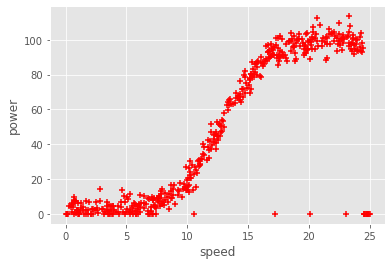

In [43]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(df_xtrain,df_ytrain,color='red',marker='+')
plt.plot(df_xtrain,reg.predict(df_xtrain),color='blue')

In [ ]:
df_xtrain.describe()

In [ ]:
pp.describe()

In [ ]:
pp[['speed']]

In [ ]:
reg.predict(X_Test)

In [ ]:
Y_Test

In [ ]:
reg.score(X_Test, Y_Test)

In [ ]:
len(Y_Test)

In [ ]:
len(X_Test)

In [ ]:
x = pp["speed"]
y = pp["power"]

In [ ]:
sns.scatterplot(x, y)

In [ ]:
from scipy.stats import pearsonr 

In [ ]:
corr, _ = pearsonr(pp["speed"], pp["power"]) 
print('Pearsons correlation: %f' % corr) 

In [ ]:
model = LinearRegression()

In [ ]:
arr = pp.to_numpy()

In [ ]:
#print(arr[:,0])

In [ ]:
x = arr[:,0]

In [ ]:
y = arr[:,1]

In [ ]:
x = x.reshape(-1, 1)

In [ ]:
x[:10]

In [ ]:
x[-10:]

In [ ]:
model.fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

In [ ]:
print('intercept:', model.intercept_)

In [ ]:
print('slope:', model.coef_)

In [ ]:
m = model.coef_

In [ ]:
model.predict([[9.746]])

### References

[1] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>
[2] yale.edu; Correlation; http://www.stat.yale.edu/Courses/1997-98/101/correl.htm <br>
[3] youtube.com; Wind Turbine Power Curve description; https://www.youtube.com/watch?v=8tNOL4ZL9Do <br>
[4] statisticshowto.com; Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/ <br>
[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis<br>
[2] Malil, F; How Good is My Predictive Model - Regression Analysis; https://medium.com/fintechexplained/part-3-regression-analysis-bcfe15a12866 <br>
[3] Frost, J; Choosing the Correct Type of Regression Analysis; https://statisticsbyjim.com/regression/choosing-regression-analysis/ <br>
[4] Brownlee, J; How to Calculate Correlation Between Variables in Python https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ <br>
[5] Raschka, S.; https://github.com/rasbt/pattern_classification/blob/master/resources/latex_equations.md#correlation---pearson <br>
[6] kite.com; How to calculate R squared with NumPy in Python; https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python <br>
[7] andrews.edu; Correlation Coefficients; https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm <br>
[8] Mester, T.; Linear Regression in Python using numpy + polyfit (with code base); https://data36.com/linear-regression-in-python-numpy-polyfit/ <br>
[9] numpy.org; numpy.polyfit; https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html <br>
[10] Mester, T.; Linear Regression in Python using numpy + polyfit (with code base); https://data36.com/linear-regression-in-python-numpy-polyfit/ <br>
[11] datatechnotes.com; Regression Model Accuracy (MAE, MSE, RMSE, R-squared) Check in R; https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html <br>
[12] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
